In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()

In [21]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df['species'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
# No. of data points fir each class.
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

# 2D Scatter Plot

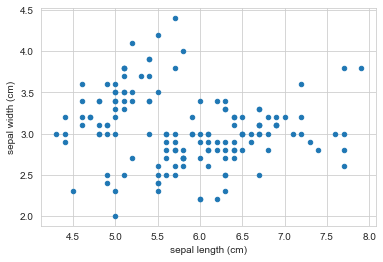

In [29]:
df.plot('sepal length (cm)','sepal width (cm)', kind='scatter')
plt.show()

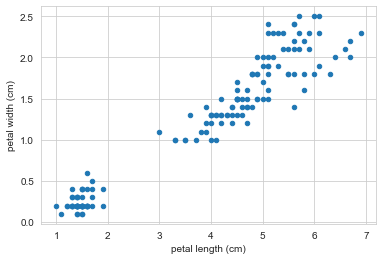

In [30]:
df.plot('petal length (cm)','petal width (cm)',kind='scatter')
plt.show()

In [31]:
iris_setosa = df.loc[df['species'] == 'setosa'] 
iris_virginica = df.loc[df["species"] == "virginica"]
iris_versicolor = df.loc[df['species'] == 'versicolor']

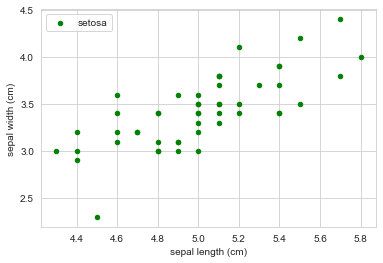

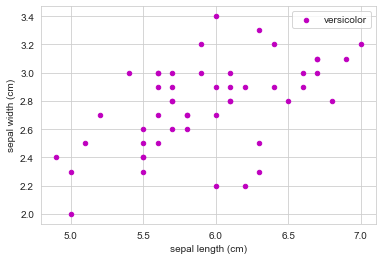

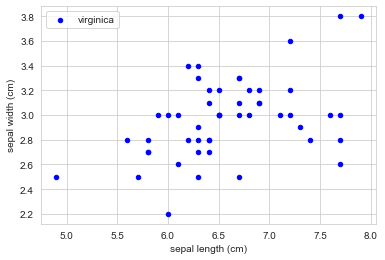

In [32]:
iris_setosa.plot(x='sepal length (cm)', y='sepal width (cm)', 
                 kind='scatter',label='setosa', color='g')

iris_versicolor.plot(x='sepal length (cm)', y='sepal width (cm)',
                    kind='scatter', label='versicolor', color='m')

iris_virginica.plot(x="sepal length (cm)", y="sepal width (cm)",
                    kind="scatter", label='virginica', color='b')
plt.show()

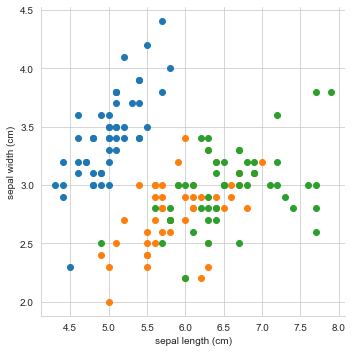

In [33]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, 'sepal length (cm)',
                                            'sepal width (cm)')
plt.show()

# Observations

Using sepallength and sepal width features, we can seprate setosa flowers from verginica and versicolor.

Seprating versicolor from verginica is much harder as they have considerable overlap.

# Pair Plot

c:\users\91863\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\91863\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\91863\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


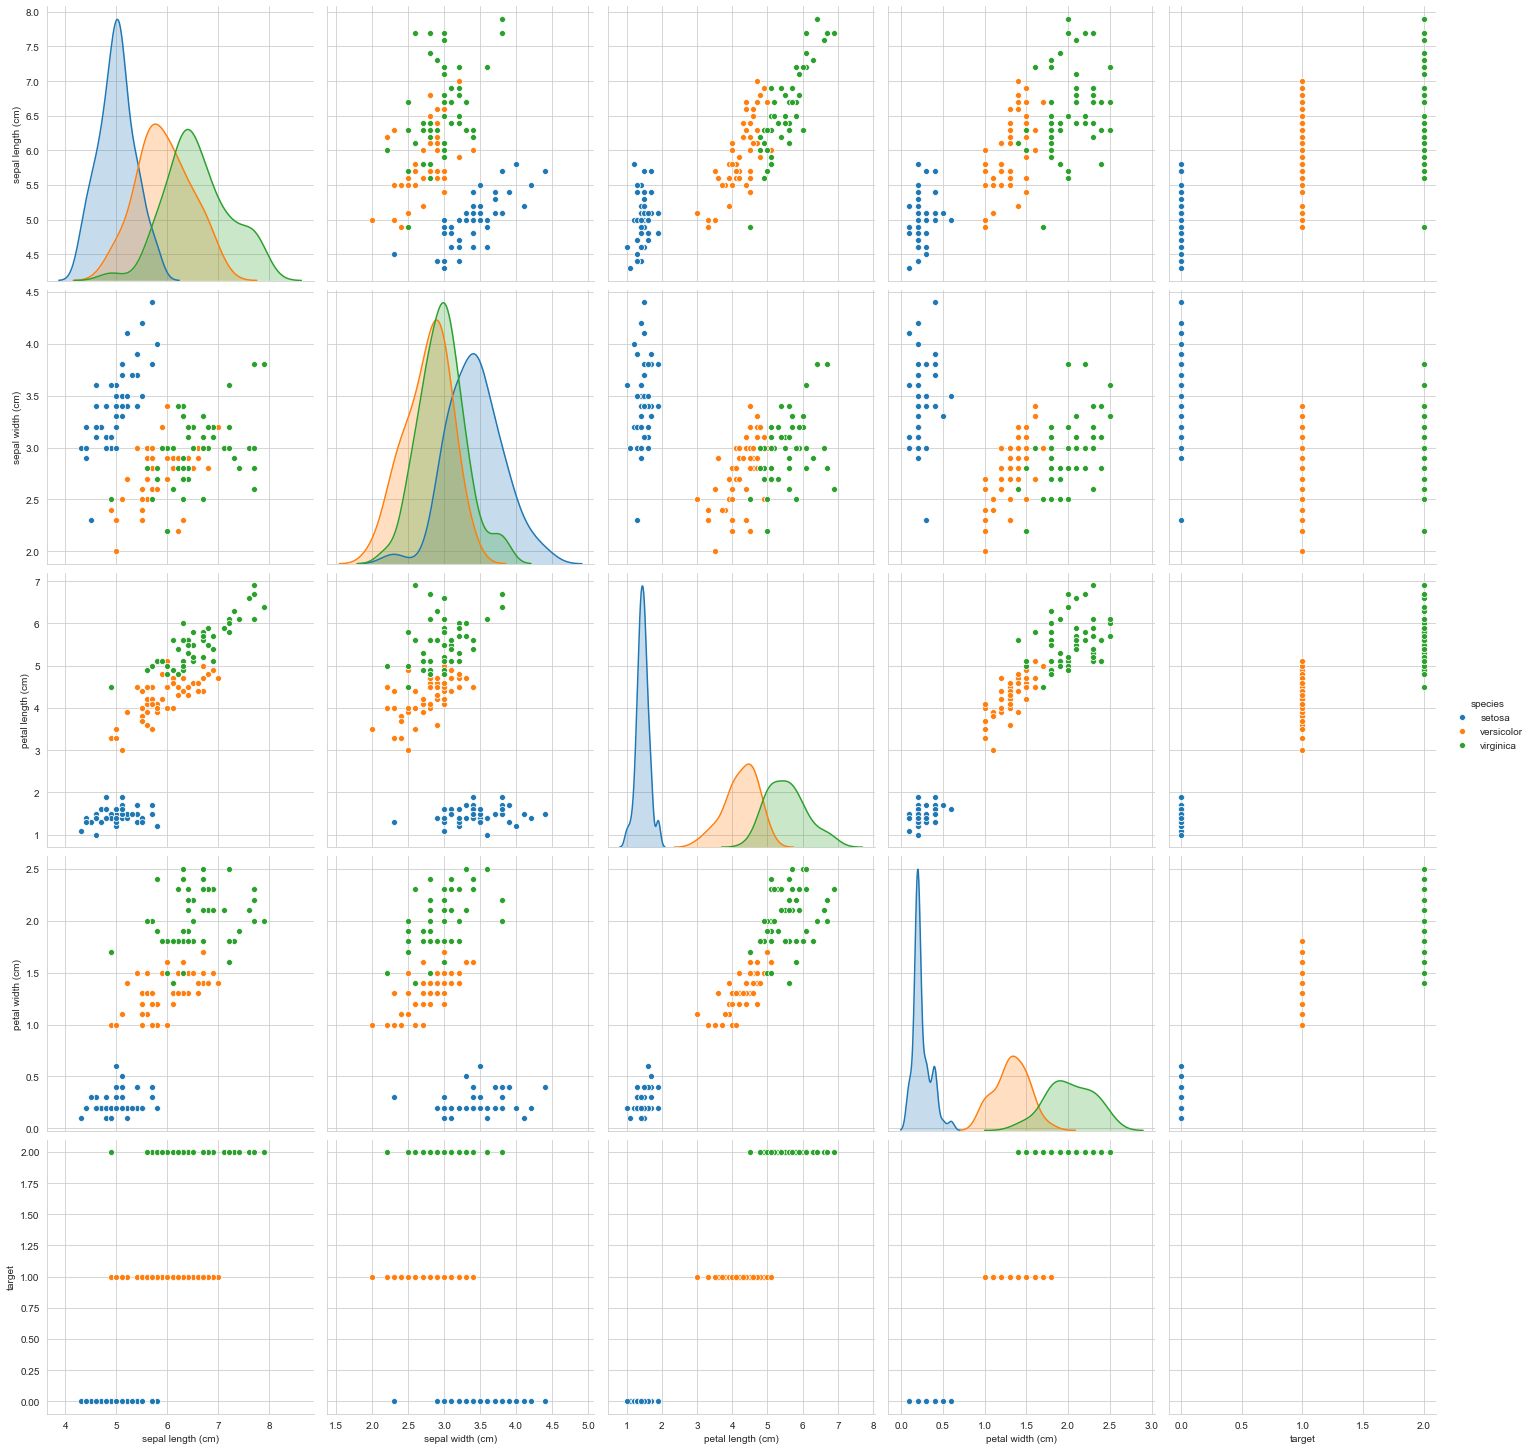

In [34]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='species',height=4)
plt.show()

# Observations
petal length and petal width are the most useful features to identify various type of flowers.

Setosa can be easily identified (linearly separable), virginica and versicolor have some overlap(almost linearly seprable).

We can find lines and if-else conditions to build a simple model to classify the flower type.

# Histogram, pdf and CDF

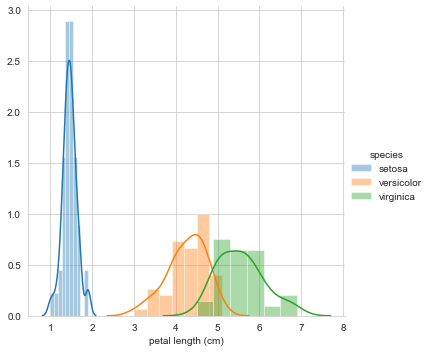

In [35]:
sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'petal length (cm)').add_legend()
plt.show()

c:\users\91863\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


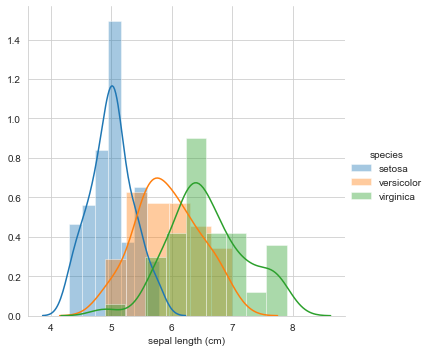

In [36]:
sns.FacetGrid(df, hue='species',size=5).map(sns.distplot, 'sepal length (cm)').add_legend()
plt.show()

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]


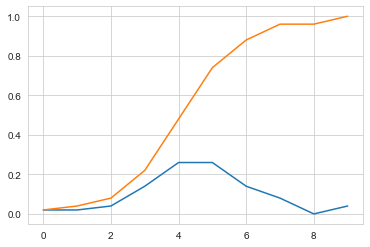

In [37]:
counts, x = np.histogram(iris_setosa['petal length (cm)'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)

cdf = np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.show()

# Mean Variance and Standard Deviation

In [38]:
print("Means")
print(np.mean(iris_setosa['petal length (cm)']))
print(np.mean(iris_versicolor['petal length (cm)']))
print(np.mean(iris_virginica['petal length (cm)']))


print("\nStandard Deviation")
print(np.std(iris_setosa['petal length (cm)']))
print(np.std(iris_versicolor['petal length (cm)']))
print(np.std(iris_virginica['petal length (cm)']))

Means
1.4620000000000002
4.26
5.5520000000000005

Standard Deviation
0.17191858538273283
0.4651881339845203
0.546347874526844


# Median, Percentile, quantile, IQR, MAD

In [39]:
from statsmodels import robust
print("Medians:")
print(np.median(iris_setosa['petal length (cm)']))
print(np.median(np.append(iris_setosa['petal length (cm)'], 50))) #with an outlier
print(np.median(iris_virginica['petal length (cm)']))
print(np.median(iris_versicolor['petal length (cm)']))

print('\nQuantiles:')
print(np.percentile(iris_setosa['petal length (cm)'], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor['petal length (cm)'], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica['petal length (cm)'], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa['petal length (cm)'], 90))
print(np.percentile(iris_virginica['petal length (cm)'], 90))
print(np.percentile(iris_versicolor['petal length (cm)'], 90))

print("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa['petal length (cm)']))
print(robust.mad(iris_virginica['petal length (cm)']))
print(robust.mad(iris_versicolor['petal length (cm)']))

Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box plot and Whiskers

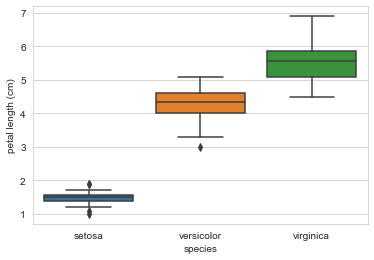

In [40]:
# Box plot with whiskers another method of visualization the 1D scatter plot more intuitively.

# In the plot below a technique call inter-quartile range is used in plotting the whiskers.

# Whiskers in the plot below do not correspond to the min and max values.
#Box plot can be visualized as pdf on the side-ways.

sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.show()

# Violin Plots

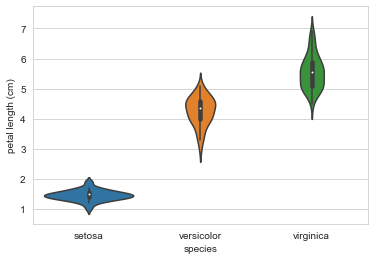

In [41]:
# A violin plot combines the benifits of the previous two plots and simplifies them.
# Denser region of the data are fatter and sparser ones thinner in a violin plot.

sns.violinplot(x='species', y='petal length (cm)', data=df, size=10)
plt.show()

# Multivariate Probability density and countour plot

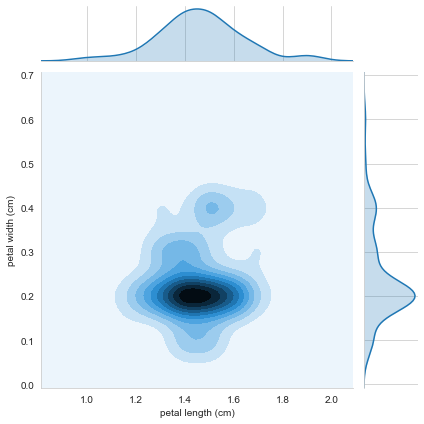

In [42]:
sns.jointplot(x='petal length (cm)', y='petal width (cm)', data=iris_setosa,
             kind='kde')
plt.show()

# Observations:

In the above 2d plot dark layer shows more points and light layers or hills shows less points.

These ligth to dark lines is called contours. This graph is called contours probability density plot

# EDA Summary


## Univarient Analysis

PDF/Histograms
CDF
BOX Plot
Violin Plot


# Bivarient Analysis

scatter Plot
Pair Plot

For Multivariant Analysis we can use 3D plot